# 1. Data Cleaning Including Missing Values, Outliers, and Multi-Collinearity

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Fraud.csv")

# EDA

In [3]:
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

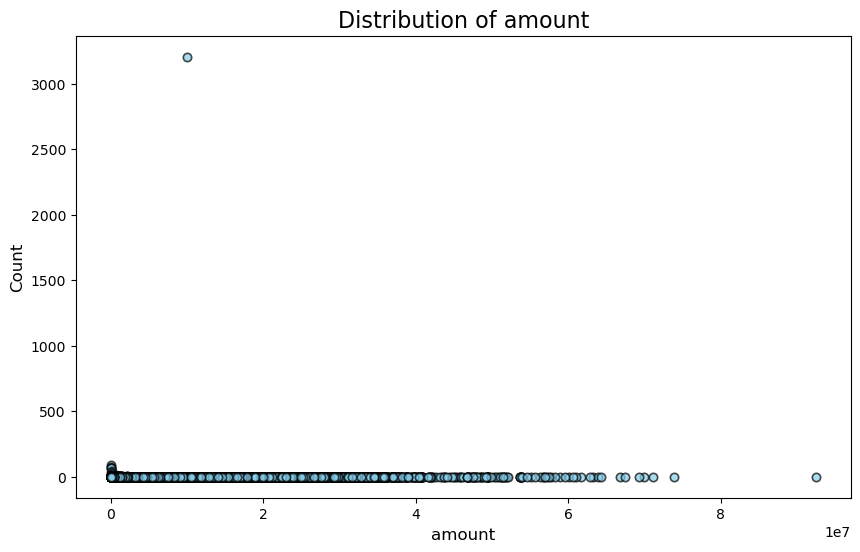

In [6]:
amount_counts = df['amount'].value_counts()

amount_counts_df = amount_counts.reset_index()
amount_counts_df.columns = ['amount', 'count']

plt.figure(figsize=(10, 6))

plt.scatter(amount_counts_df['amount'], amount_counts_df['count'], color='skyblue', alpha=0.7, edgecolor='black', linewidth=1.2)

plt.title('Distribution of amount', fontsize=16)
plt.xlabel('amount', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [7]:
df['amount']

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [8]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [9]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


# Missing values

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# Handling Outliers

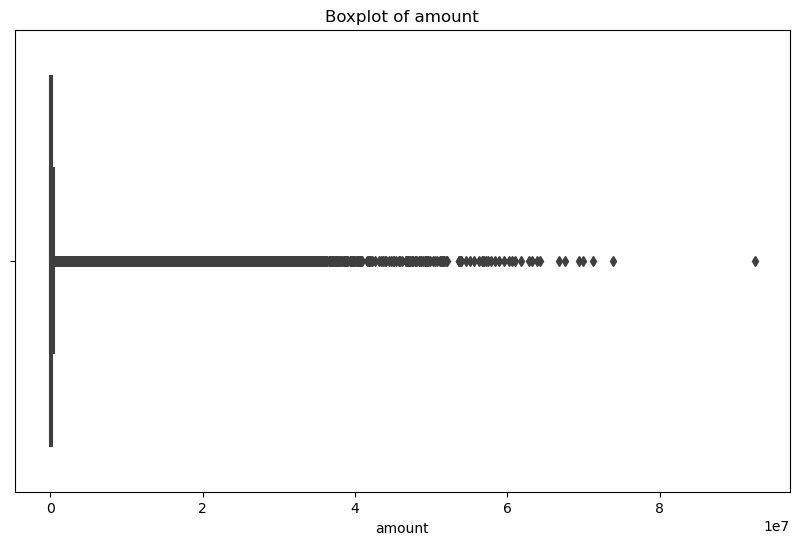

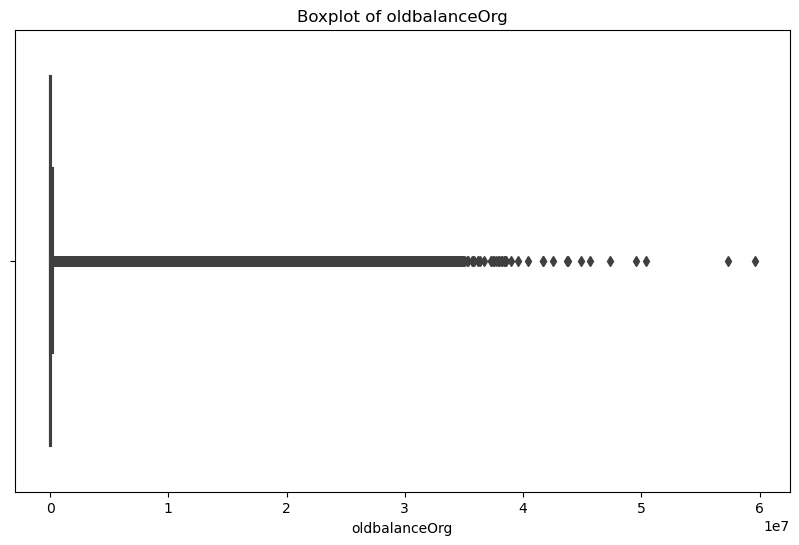

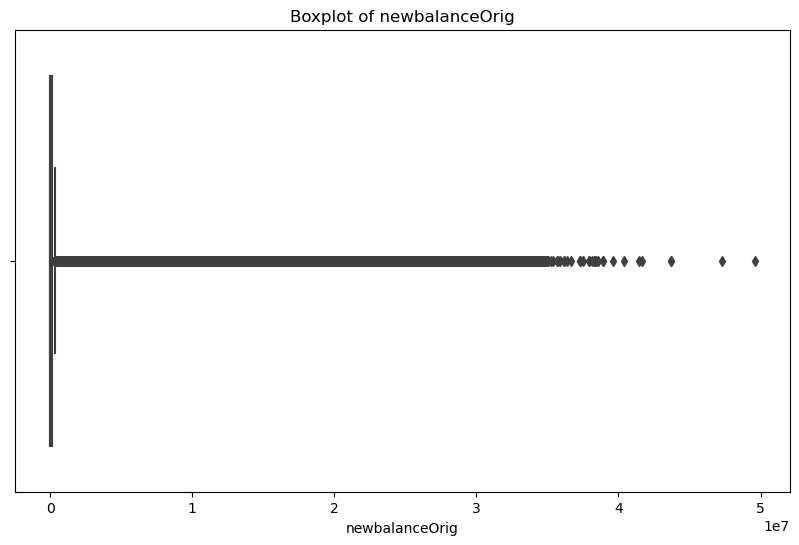

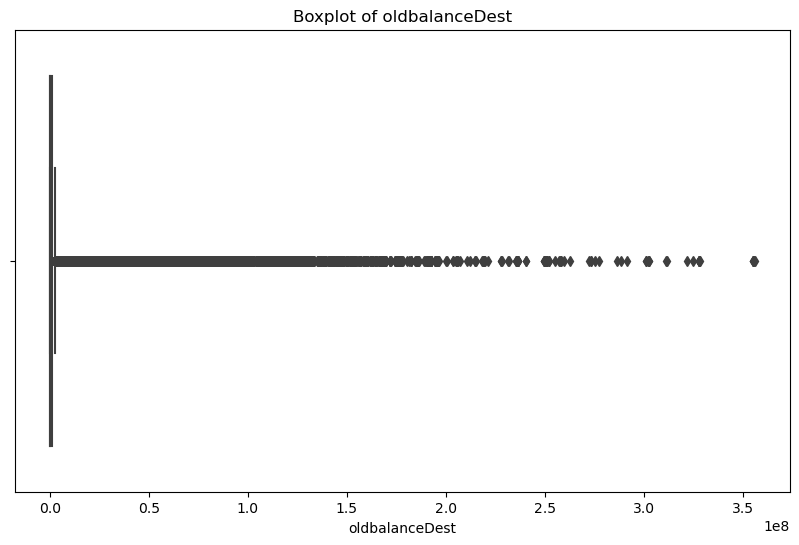

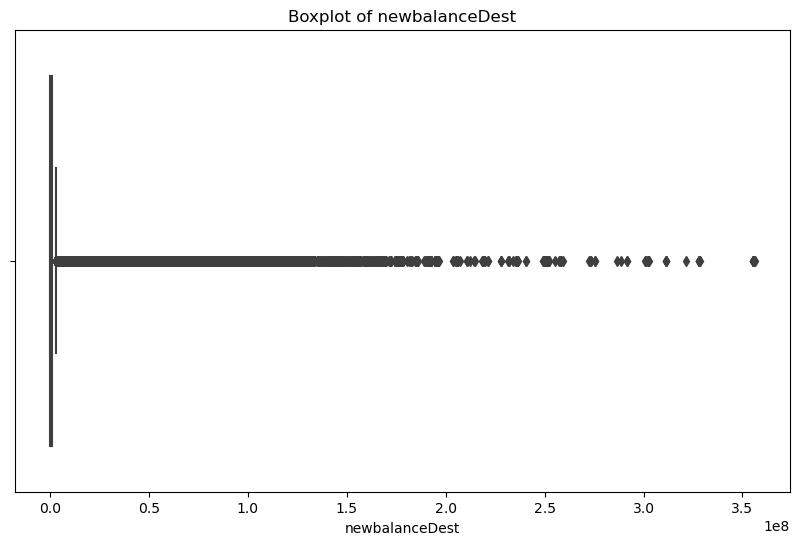

In [11]:
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for feature in numerical_features:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## Removing outliers of Amount

In [12]:
outliers = df[df['amount']> 80000000]
print("Rows where 'amount' is 80000000:")
print(outliers)

Rows where 'amount' is 80000000:
         step      type       amount     nameOrig  oldbalanceOrg  \
3686583   276  TRANSFER  92445516.64  C1715283297            0.0   

         newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3686583             0.0  C439737079         9595.98     92455112.62        0   

         isFlaggedFraud  
3686583               0  


In [13]:
df = df[df['amount'] < 80000000]

## Removing outliers of oldbalanceOrg

In [14]:
outliers = df[df['oldbalanceOrg']> 55000000]
print("Rows where 'oldbalanceOrg' is 55000000:")
print(outliers)

Rows where 'oldbalanceOrg' is 55000000:
         step      type      amount    nameOrig  oldbalanceOrg  \
5996399   425  TRANSFER  10000000.0   C40489106    59585040.37   
6362452   730  TRANSFER  10000000.0  C726730575    57316255.05   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
5996399     49585040.37   C650095152             0.0             0.0        1   
6362452     47316255.05  C1364745638             0.0             0.0        1   

         isFlaggedFraud  
5996399               0  
6362452               0  


In [15]:
df = df[df['oldbalanceOrg'] < 55000000]

## Removing outliers of newbalanceOrig

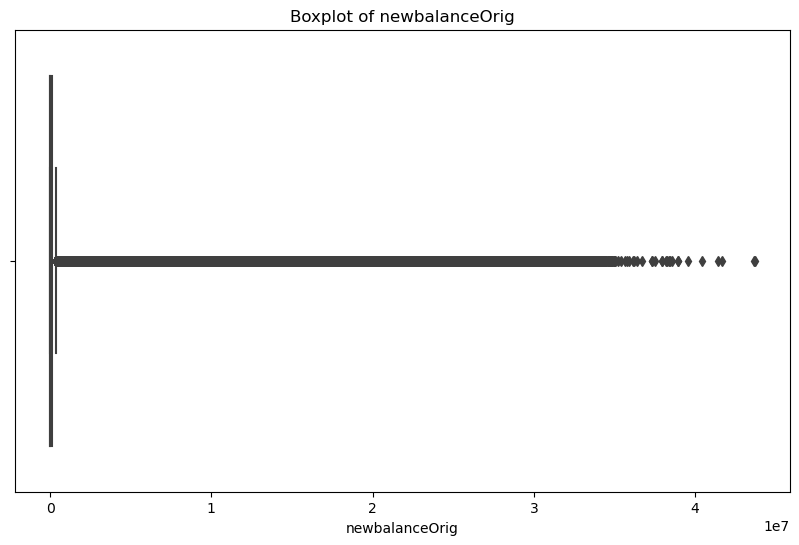

In [16]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['newbalanceOrig'])
plt.title(f'Boxplot of newbalanceOrig')
plt.show()

In [17]:
outliers = df[df['newbalanceOrig']> 45000000]
print("Rows where 'newbalanceOrig' is 45000000:")
print(outliers)

Rows where 'newbalanceOrig' is 45000000:
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## Removing outliers of oldbalanceDest

In [18]:
outliers = df[df['oldbalanceDest']> 350000000]
print("Rows where 'oldbalanceDest' is 350000000:")
print(outliers)

Rows where 'oldbalanceDest' is 350000000:
         step      type     amount     nameOrig  oldbalanceOrg  \
4596803   328   CASH_IN  171982.69   C758787020       31748.00   
4721497   332   CASH_IN  195896.55   C494525103     4178494.78   
5380607   376  CASH_OUT  194946.47     C4896808           0.00   
5486389   380  TRANSFER  635405.82  C1666289749           0.00   
5920180   404  CASH_OUT  163389.56  C1323053481           0.00   

         newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4596803       203730.69  C439737079    3.555534e+08    3.553814e+08        0   
4721497      4374391.33  C439737079    3.553814e+08    3.551855e+08        0   
5380607            0.00  C439737079    3.551855e+08    3.553805e+08        0   
5486389            0.00  C439737079    3.553805e+08    3.560159e+08        0   
5920180            0.00  C439737079    3.560159e+08    3.561793e+08        0   

         isFlaggedFraud  
4596803               0  
4721497               0  
53

In [19]:
df = df[df['oldbalanceDest'] < 350000000]

## Removing outliers of newbalanceDest

In [20]:
outliers = df[df['newbalanceDest']> 350000000]
print("Rows where 'newbalanceDest' is 350000000:")
print(outliers)

Rows where 'newbalanceDest' is 350000000:
         step      type       amount     nameOrig  oldbalanceOrg  \
4124250   302  TRANSFER   3325263.90  C1812458696            0.0   
4133583   302  TRANSFER  30638354.89  C1800693711            0.0   

         newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4124250             0.0  C439737079    3.215898e+08     355553416.3        0   
4133583             0.0  C439737079    3.249151e+08     355553416.3        0   

         isFlaggedFraud  
4124250               0  
4133583               0  


In [21]:
df = df[df['newbalanceDest'] < 350000000]

# Multi-collinearity

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21288\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022398      -0.010074       -0.010311   
amount          0.022398  1.000000      -0.002861       -0.007951   
oldbalanceOrg  -0.010074 -0.002861       1.000000        0.998805   
newbalanceOrig -0.010311 -0.007951       0.998805        1.000000   
oldbalanceDest  0.027742  0.295598       0.066637        0.068212   
newbalanceDest  0.025945  0.461198       0.042262        0.042067   
isFraud         0.031561  0.076716       0.009982       -0.008292   
isFlaggedFraud  0.003277  0.012320       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027742        0.025945  0.031561        0.003277  
amount                0.295598        0.461198  0.076716        0.012320  
oldbalanceOrg         0.066637        0.042262  0.009982        0.003835  
newbalanceOrig        0.068212        0.042067 -0.008292        0.003776  
old

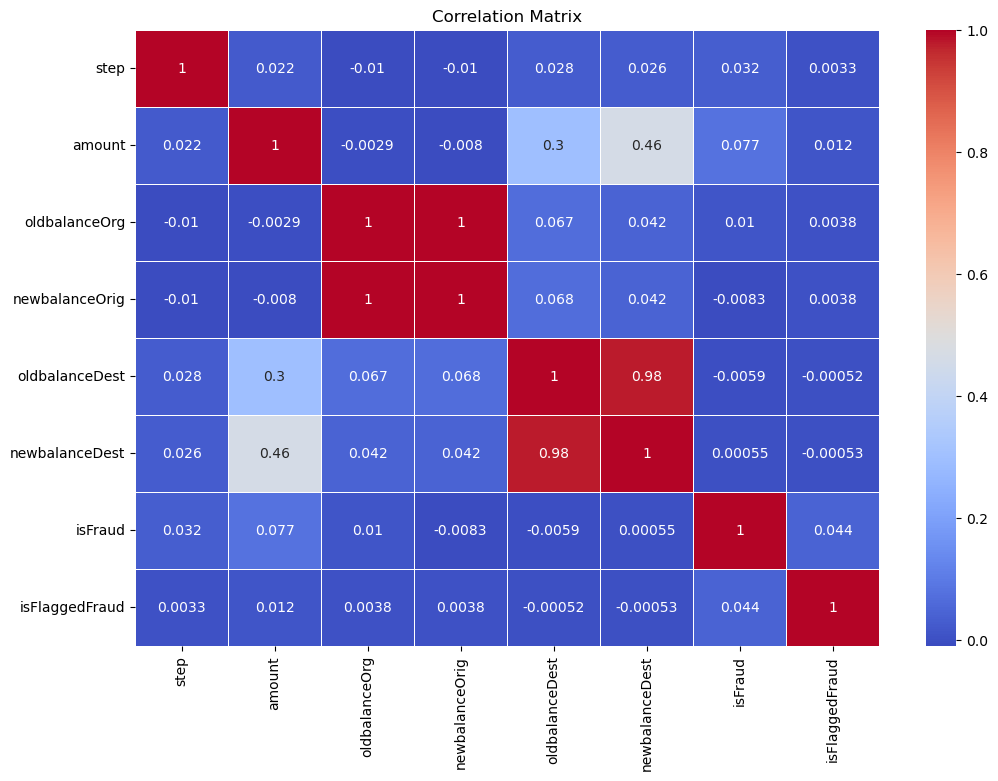

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [24]:
df['balanceOrigDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

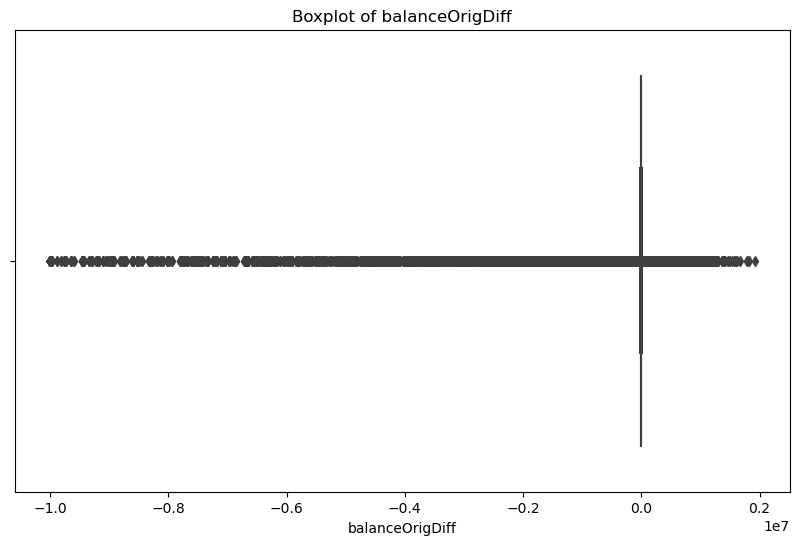

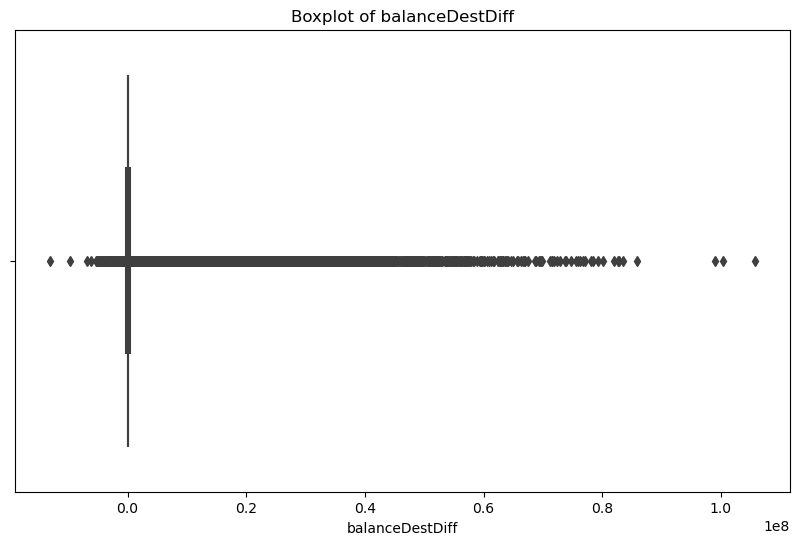

In [25]:
numerical_features = ['balanceOrigDiff','balanceDestDiff']

for feature in numerical_features:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [26]:
outliers = df[df['balanceDestDiff']> 90000000]
print("Rows where 'balanceDestDiff' is 90000000:")
print(outliers)

Rows where 'balanceDestDiff' is 90000000:
         step      type       amount     nameOrig  oldbalanceOrg  \
3892529   284  TRANSFER  64234448.19  C1139847449           0.00   
3963647   297  TRANSFER  23496309.32   C515885166           0.00   
4136960   303  TRANSFER  29802113.19  C1289440255      550210.01   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3892529             0.0    C65111466    6.597691e+07    1.663021e+08        0   
3963647             0.0   C707403537    2.123595e+08    3.114049e+08        0   
4136960             0.0  C1496190878    4.857447e+07    1.542623e+08        0   

         isFlaggedFraud  balanceOrigDiff  balanceDestDiff  
3892529               0             0.00     1.003252e+08  
3963647               0             0.00     9.904545e+07  
4136960               0       -550210.01     1.056878e+08  


In [27]:
df = df[df['balanceDestDiff'] < 90000000]

In [28]:
outliers = df[df['balanceDestDiff']<-5000000]
print("Rows where 'balanceDestDiff' is less than -5000000:")
print(outliers)

Rows where 'balanceDestDiff' is less than -5000000:
         step      type      amount     nameOrig  oldbalanceOrg  \
1520        1  CASH_OUT   119570.96     C3886839           0.00   
1714        1   CASH_IN    37475.31  C1731967318     3784262.55   
4340        4   CASH_IN   130407.77  C1983472905     5347521.57   
32466       8  CASH_OUT   541339.15  C2024363230           0.00   
34953       8  TRANSFER  1492123.04   C138617241           0.00   
1002588    45  CASH_OUT   296275.60   C117604172      558605.47   
4952297   351  TRANSFER  1240864.53   C983895909       94465.74   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1520               0.00  C1170794006      5255923.71        22190.99        0   
1714         3821737.86  C1170794006      5375494.66        22190.99        0   
4340         5477929.34  C1122118227     13060826.21            0.00        0   
32466              0.00  C1671386208      6214174.81            0.00        0   
34953 

In [29]:
df = df[df['balanceDestDiff'] > -5000000]

In [30]:
len(df['amount'])

6362600

In [31]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# 2. Describe Your Fraud Detection Model in Elaboration

# Model Building

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceOrigDiff', 'balanceDestDiff', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [34]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,-9839.64,0.00,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,-1864.28,0.00,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,-181.00,0.00,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,-181.00,-21182.00,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,-11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,-339682.13,339682.13,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,-6311409.28,0.00,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,-850002.52,0.00,0,0,0,1


In [35]:
# Define features and target
features = df.drop(columns=['nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'])
target = df['isFraud']

## Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [39]:
# Initialize and train the model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# Make predictions
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.36      0.45      0.40      1629

    accuracy                           1.00   1272520
   macro avg       0.68      0.73      0.70   1272520
weighted avg       1.00      1.00      1.00   1272520



In [41]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)

[[1269566    1325]
 [    892     737]]
ROC AUC Score: 0.8824325541373896
Accuracy of the Logistic Regression model: 0.9982577876968535


## Hyperparameter tuning

In [42]:
from tqdm import tqdm
from sklearn.model_selection import  GridSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='saga')

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
}

In [ ]:
# Wrapping the GridSearchCV fit process with tqdm to show progress
class TqdmProgressBar(tqdm):
    def __init__(self, *args, total=None, **kwargs):
        super().__init__(*args, total=total, **kwargs)
    
    def update_to(self, n):
        self.update(n - self.n)

    def __call__(self, iterable):
        for obj in iterable:
            yield obj
            self.update_to(1)

progress_bar = TqdmProgressBar(total=len(param_grid['C']) * len(param_grid['penalty']))

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

with progress_bar as pbar:
    grid_search.fit(X_train, y_train)

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [45]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.87      0.68      0.77      1629

    accuracy                           1.00   1272520
   macro avg       0.94      0.84      0.88   1272520
weighted avg       1.00      1.00      1.00   1272520

Confusion Matrix:
[[1270731     160]
 [    517    1112]]
ROC AUC Score: 0.9116722470408043
Accuracy of the KNN model: 0.9994679847860938


In [46]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=8)  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=8)

In [47]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.90      0.64      0.75      1629

    accuracy                           1.00   1272520
   macro avg       0.95      0.82      0.88   1272520
weighted avg       1.00      1.00      1.00   1272520

Confusion Matrix:
[[1270776     115]
 [    580    1049]]
ROC AUC Score: 0.9220242444051588
Accuracy of the KNN model: 0.9994538396253104


## ANN

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [50]:
model = Sequential()

model.add(Dense(5, input_dim=X_train_sc.shape[1], activation='relu'))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train_sc, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
127252/127252 [==============================] - 528s 4ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 2/10
127252/127252 [==============================] - 472s 4ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 3/10
127252/127252 [==============================] - 476s 4ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 4/10
127252/127252 [==============================] - 501s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 5/10
127252/127252 [==============================] - 463s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 6/10
127252/127252 [==============================] - 467s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 7/10
127252/127252 [==============================] - 498s 4ms/step - loss: 0.0021 - accuracy:

In [53]:
# Making predictions
y_pred = (model.predict(X_test_sc) > 0.5).astype("int32")

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

39767/39767 [==============================] - 97s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.90      0.75      0.82      1629

    accuracy                           1.00   1272520
   macro avg       0.95      0.87      0.91   1272520
weighted avg       1.00      1.00      1.00   1272520

[[1270752     139]
 [    408    1221]]


In [54]:
# Calculate and print the ROC AUC score
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

39767/39767 [==============================] - 100s 3ms/step
ROC AUC Score: 0.6410307453855312


In [55]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the ANN model:", accuracy)

Accuracy of the ANN model: 0.99957014428064


## KNN with 10 neighbors

In [56]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [57]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.91      0.64      0.75      1629

    accuracy                           1.00   1272520
   macro avg       0.95      0.82      0.88   1272520
weighted avg       1.00      1.00      1.00   1272520

Confusion Matrix:
[[1270784     107]
 [    585    1044]]
ROC AUC Score: 0.9262748693850411
Accuracy of the KNN model: 0.9994561971521077


In [58]:
# Calculate and print precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.9070373588184187
Recall: 0.6408839779005525


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [60]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270891
           1       0.98      0.81      0.89      1629

    accuracy                           1.00   1272520
   macro avg       0.99      0.91      0.94   1272520
weighted avg       1.00      1.00      1.00   1272520

[[1270858      33]
 [    302    1327]]
ROC AUC Score: 0.9072921121329727


In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", accuracy)

Accuracy of the Random Forest model: 0.9997367428409769


# 3. How Did You Select Variables to Be Included in the Model?

# 4. Demonstrate the Performance of the Model by Using Best Set of Tools

# 5. What Are the Key Factors That Predict Fraudulent Customer?

## Feature selection

In [63]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

            Feature  Importance
6   balanceOrigDiff    0.286560
7   balanceDestDiff    0.163967
5    newbalanceDest    0.141235
2     oldbalanceOrg    0.104075
1            amount    0.093627
0              step    0.069065
4    oldbalanceDest    0.051542
11    type_TRANSFER    0.047318
3    newbalanceOrig    0.023801
8     type_CASH_OUT    0.017548
10     type_PAYMENT    0.001151
9        type_DEBIT    0.000111


In [ ]:
import shap

# Feature Importance from Model
feature_importances.sort_values(by='importance', ascending=False)

# SHAP Values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Hyperparameter tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize Grid Search with increased verbosity
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=True, scoring='accuracy')


# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


# 6. Do These Factors Make Sense? If Yes, How? If Not, How Not?

# 7. What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?

# 8. Assuming These Actions Have Been Implemented, How Would You Determine If They Work?

In [64]:
# Assume you have fraud rates data pre and post-implementation
pre_implementation_fraud_rate = 0.02  # Example rate
post_implementation_fraud_rate = 0.01  # Example rate

# Calculate reduction
reduction = pre_implementation_fraud_rate - post_implementation_fraud_rate
print(f'Fraud rate reduction: {reduction*100:.2f}%')


Fraud rate reduction: 1.00%
